In [1]:
import xgboost
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Life Expectancy Data Europe Recodificado.csv")
df.dropna(axis='rows', how='all', inplace=True) # Borra las filas que tengan todos los valores faltantes

In [3]:
df2 = df.drop(df.columns[0:3], axis=1)
df2.head()

Life expectancy  Adult Mortality  Alcohol  Percentage expenditure   BMI  \
0             78.1               94     13.2                 2269.13  51.0   
1             78.6               90     12.4                 2282.52  56.0   
2             78.7               87     12.5                 2497.87  51.2   
3             78.8               86     12.2                 3091.24  51.7   
4             79.3               84     12.1                 3594.65  52.2   

   Under-five deaths  Total expenditure          GDP  Population  \
0                  0               1.60  24517.26745      811566   
1                  0               1.12  24489.73553      842293   
2                  0               1.27  26351.37568      881957   
3                  0               1.48   3212.93550     8121423   
4                  0               1.56  36693.42620     8171966   

   Thinness 1-19 years  Thinness 5-9 years  Income composition of resources  \
0                  1.7                 1.9                            0.833   
1                  1.7                 1.9                            0.837   
2                  1.7                 1.9                            0.847   
3                  1.7                 1.9                            0.837   
4                  1.7                 1.9                            0.841   

   Schooling  Average temperature  CO2 Emissions  Cholesterol  Smoking  
0       15.4                 7.99            7.9          3.9     52.3  
1       15.5                 7.04            8.4          3.9      NaN  
2       16.1                 7.74            8.6          3.9      NaN  
3       14.7                 7.37            9.2          3.8      NaN  
4       14.7                 6.77            9.3          3.8      NaN

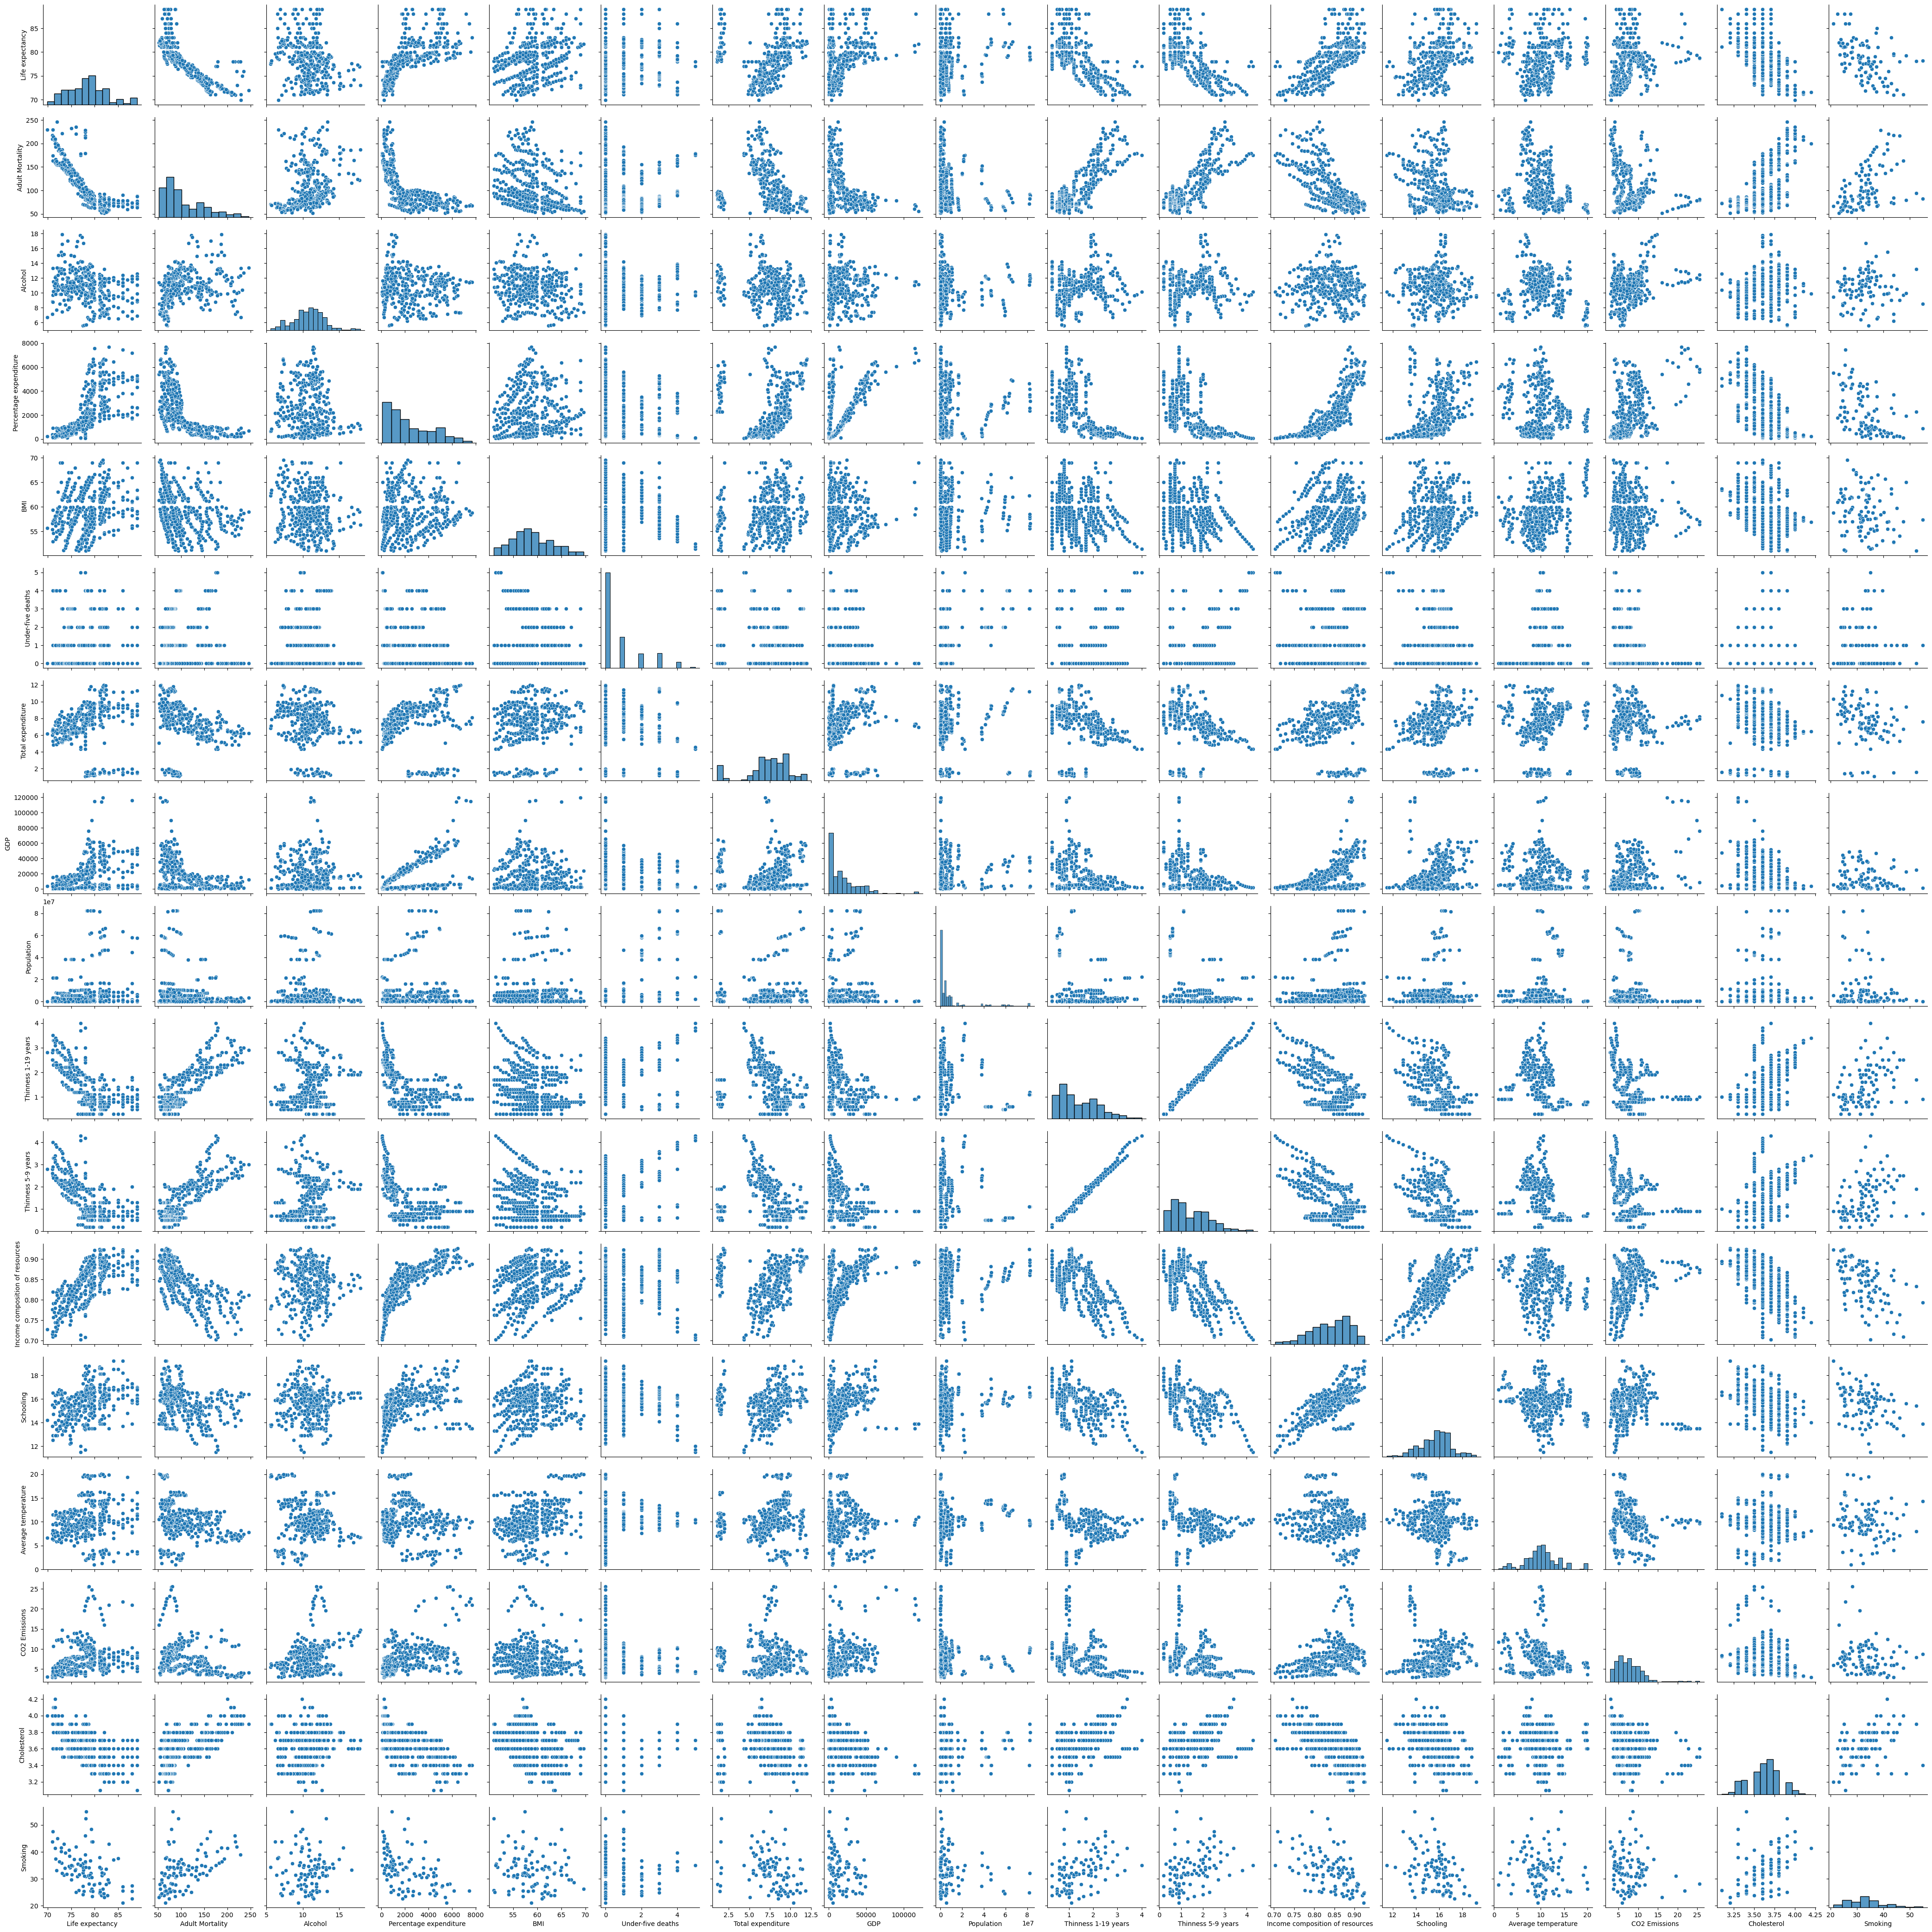

In [4]:
sns.pairplot(data=df2)

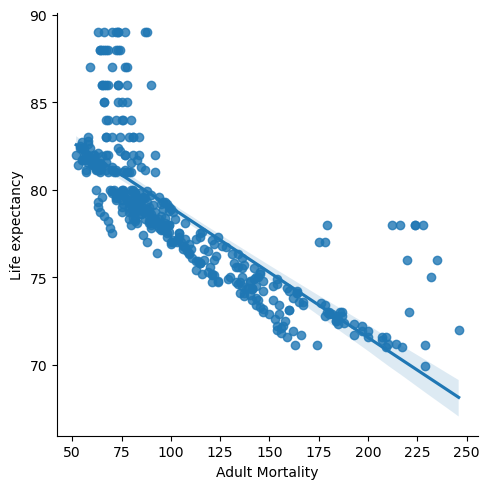

In [4]:
sns.lmplot(x='Adult Mortality',y='Life expectancy',data=df2)
None

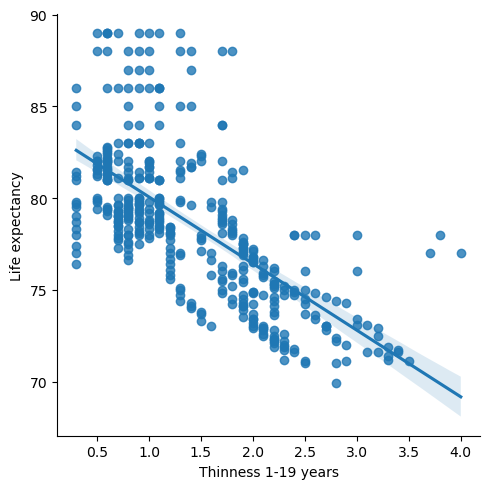

In [5]:
sns.lmplot(x='Thinness 1-19 years',y='Life expectancy',data=df2)
None

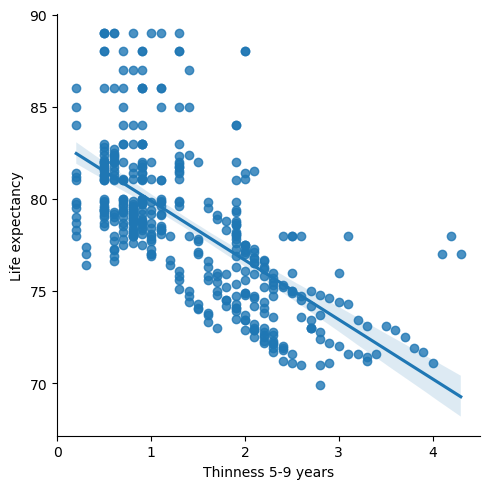

In [6]:
sns.lmplot(x='Thinness 5-9 years',y='Life expectancy',data=df2)
None

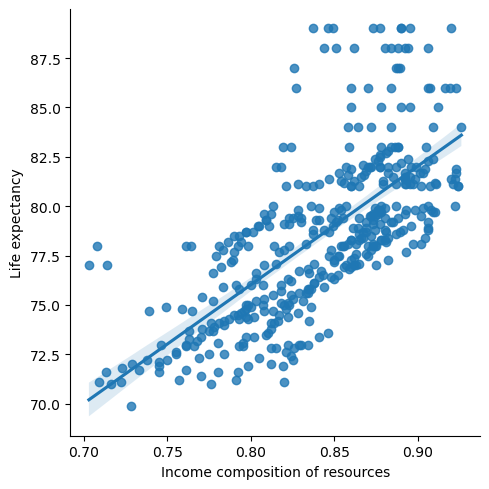

In [7]:
sns.lmplot(x='Income composition of resources',y='Life expectancy',data=df2)
None

In [8]:
df2.corr()

Life expectancy  Adult Mortality   Alcohol  \
Life expectancy                         1.000000        -0.786966 -0.272221   
Adult Mortality                        -0.786966         1.000000  0.290689   
Alcohol                                -0.272221         0.290689  1.000000   
Percentage expenditure                  0.698183        -0.684611 -0.113000   
BMI                                     0.255659        -0.235954 -0.161379   
Under-five deaths                       0.051128        -0.005206 -0.059987   
Total expenditure                       0.153640        -0.248459 -0.246667   
GDP                                     0.374072        -0.402227  0.003711   
Population                              0.159750        -0.166669 -0.018007   
Thinness 1-19 years                    -0.669904         0.818281  0.160521   
Thinness 5-9 years                     -0.657211         0.798242  0.153303   
Income composition of resources         0.696117        -0.706301 -0.036915   
Schooling                               0.418312        -0.326418  0.009274   
Average temperature                     0.144087        -0.278712 -0.130945   
CO2 Emissions                           0.181120        -0.298974  0.275378   
Cholesterol                            -0.571066         0.610103  0.235916   
Smoking                                -0.475282         0.487249  0.031090   

                                 Percentage expenditure       BMI  \
Life expectancy                                0.698183  0.255659   
Adult Mortality                               -0.684611 -0.235954   
Alcohol                                       -0.113000 -0.161379   
Percentage expenditure                         1.000000  0.080815   
BMI                                            0.080815  1.000000   
Under-five deaths                             -0.046688 -0.065430   
Total expenditure                              0.120319  0.186207   
GDP                                            0.585582 -0.018063   
Population                                     0.101694  0.017952   
Thinness 1-19 years                           -0.582910 -0.217133   
Thinness 5-9 years                            -0.580907 -0.229034   
Income composition of resources                0.826920  0.182724   
Schooling                                      0.416254  0.143452   
Average temperature                           -0.149185  0.377055   
CO2 Emissions                                  0.429248 -0.101316   
Cholesterol                                   -0.605095 -0.333878   
Smoking                                       -0.472692 -0.192587   

                                 Under-five deaths  Total expenditure  \
Life expectancy                           0.051128           0.153640   
Adult Mortality                          -0.005206          -0.248459   
Alcohol                                  -0.059987          -0.246667   
Percentage expenditure                   -0.046688           0.120319   
BMI                                      -0.065430           0.186207   
Under-five deaths                         1.000000          -0.208567   
Total expenditure                        -0.208567           1.000000   
GDP                                      -0.088475           0.094090   
Population                                0.521565          -0.131876   
Thinness 1-19 years                       0.024638          -0.250267   
Thinness 5-9 years                        0.067496          -0.267424   
Income composition of resources          -0.094824           0.175302   
Schooling                                -0.102489           0.146427   
Average temperature                       0.188381           0.093752   
CO2 Emissions                            -0.155293          -0.039574   
Cholesterol                               0.016439          -0.212635   
Smoking                                  -0.031889          -0.297172   

                                      GDP  Populatio

C:\Users\arche\AppData\Local\Temp\ipykernel_24396\2569207017.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_correlations = df.corr()


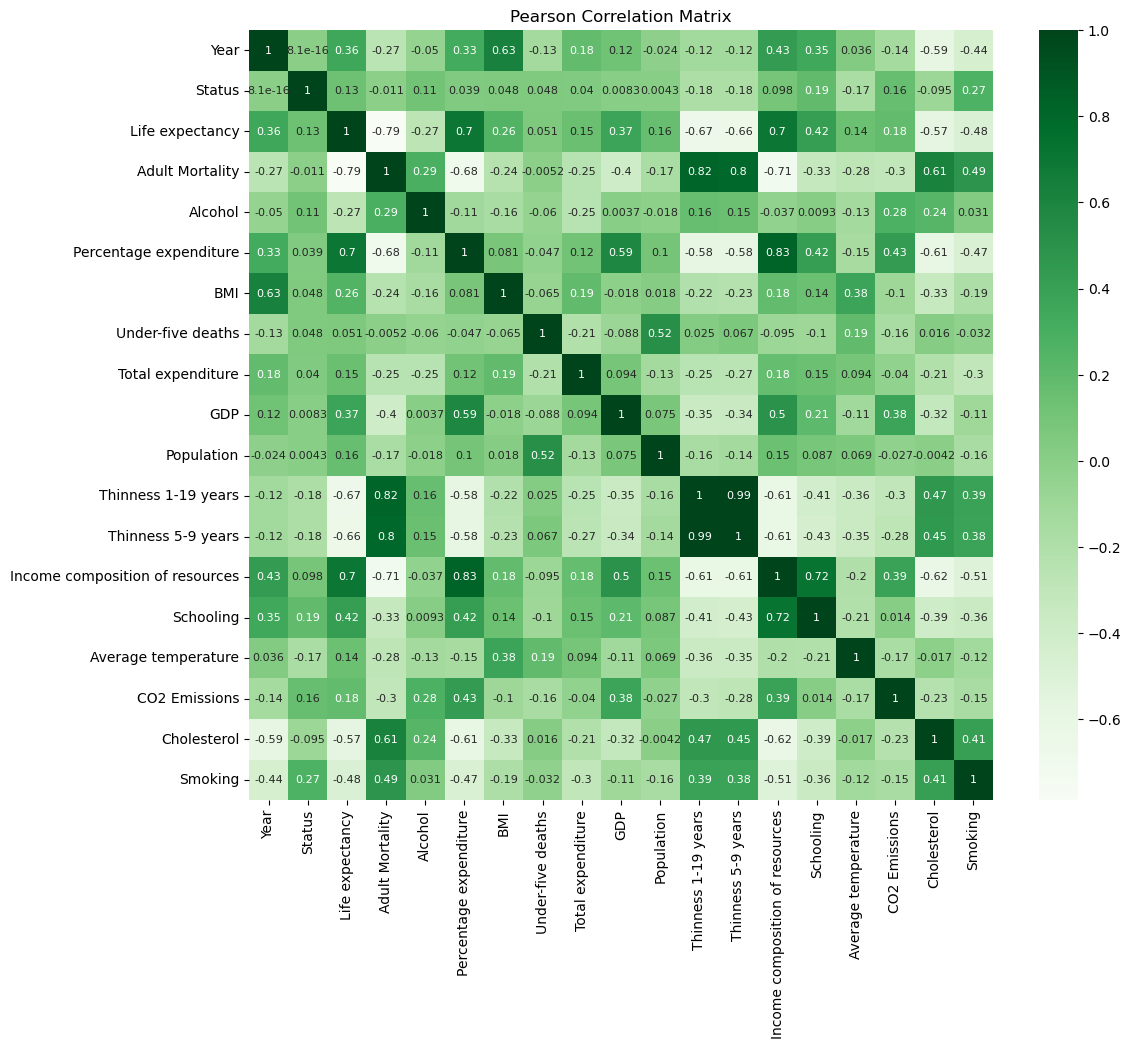

In [9]:
fig_1 = plt.figure(figsize=(12, 10))
new_correlations = df.corr()
sns.heatmap(new_correlations, annot=True, cmap='Greens', annot_kws={'size': 8})
plt.title('Pearson Correlation Matrix')
plt.show()

In [10]:
highly_correlated_features = new_correlations[new_correlations > 0.50]
highly_correlated_features.fillna('-')

Year Status Life expectancy  \
Year                                  1.0      -               -   
Status                                  -    1.0               -   
Life expectancy                         -      -             1.0   
Adult Mortality                         -      -               -   
Alcohol                                 -      -               -   
Percentage expenditure                  -      -        0.698183   
BMI                              0.628048      -               -   
Under-five deaths                       -      -               -   
Total expenditure                       -      -               -   
GDP                                     -      -               -   
Population                              -      -               -   
Thinness 1-19 years                     -      -               -   
Thinness 5-9 years                      -      -               -   
Income composition of resources         -      -        0.696117   
Schooling                               -      -               -   
Average temperature                     -      -               -   
CO2 Emissions                           -      -               -   
Cholesterol                             -      -               -   
Smoking                                 -      -               -   

                                Adult Mortality Alcohol  \
Year                                          -       -   
Status                                        -       -   
Life expectancy                               -       -   
Adult Mortality                             1.0       -   
Alcohol                                       -     1.0   
Percentage expenditure                        -       -   
BMI                                           -       -   
Under-five deaths                             -       -   
Total expenditure                             -       -   
GDP                                           -       -   
Population                                    -       -   
Thinness 1-19 years                    0.818281       -   
Thinness 5-9 years                     0.798242       -   
Income composition of resources               -       -   
Schooling                                     -       -   
Average temperature                           -       -   
CO2 Emissions                                 -       -   
Cholesterol                            0.610103       -   
Smoking                                       -       -   

                                Percentage expenditure       BMI  \
Year                                                 -  0.628048   
Status                                               -         -   
Life expectancy                               0.698183         -   
Adult Mortality                                      -         -   
Alcohol                                              -         -   
Percentage expenditure                             1.0         -   
BMI                                                  -       1.0   
Under-five deaths                                    -         -   
Total expenditure                                    -         -   
GDP                                           0.585582         -   
Population                                           -         -   
Thinness 1-19 years                                  -         -   
Thinness 5-9 years                                   -         -   
Income composition of resources                0.82692         -   
Schooling                                            -         -   
Average temperature                                  -         -   
CO2 Emissions                                        -         -   
Cholesterol                                          -         -   
Smoking                                              -         -   

                                Under-five deaths Total expenditure       GDP  \
Year                                            -    

In [11]:
highly_correlated_features = new_correlations[new_correlations < -0.50]
highly_correlated_features.fillna('-')

Year Status Life expectancy  \
Year                                    -      -               -   
Status                                  -      -               -   
Life expectancy                         -      -               -   
Adult Mortality                         -      -       -0.786966   
Alcohol                                 -      -               -   
Percentage expenditure                  -      -               -   
BMI                                     -      -               -   
Under-five deaths                       -      -               -   
Total expenditure                       -      -               -   
GDP                                     -      -               -   
Population                              -      -               -   
Thinness 1-19 years                     -      -       -0.669904   
Thinness 5-9 years                      -      -       -0.657211   
Income composition of resources         -      -               -   
Schooling                               -      -               -   
Average temperature                     -      -               -   
CO2 Emissions                           -      -               -   
Cholesterol                     -0.585409      -       -0.571066   
Smoking                                 -      -               -   

                                Adult Mortality Alcohol  \
Year                                          -       -   
Status                                        -       -   
Life expectancy                       -0.786966       -   
Adult Mortality                               -       -   
Alcohol                                       -       -   
Percentage expenditure                -0.684611       -   
BMI                                           -       -   
Under-five deaths                             -       -   
Total expenditure                             -       -   
GDP                                           -       -   
Population                                    -       -   
Thinness 1-19 years                           -       -   
Thinness 5-9 years                            -       -   
Income composition of resources       -0.706301       -   
Schooling                                     -       -   
Average temperature                           -       -   
CO2 Emissions                                 -       -   
Cholesterol                                   -       -   
Smoking                                       -       -   

                                Percentage expenditure BMI Under-five deaths  \
Year                                                 -   -                 -   
Status                                               -   -                 -   
Life expectancy                                      -   -                 -   
Adult Mortality                              -0.684611   -                 -   
Alcohol                                              -   -                 -   
Percentage expenditure                               -   -                 -   
BMI                                                  -   -                 -   
Under-five deaths                                    -   -                 -   
Total expenditure                                    -   -                 -   
GDP                                                  -   -                 -   
Population                                           -   -                 -   
Thinness 1-19 years                           -0.58291   -                 -   
Thinness 5-9 years                           -0.580907   -                 -   
Income composition of resources                      -   -                 -   
Schooling                                            -   -                 -   
Average temperature                                  -   -                 -   
CO2 Emissions                                        -   -                 -   
Cholesterol                                  -0.605095 

In [12]:
correlations = df.corr()
correlations['Life expectancy']

C:\Users\arche\AppData\Local\Temp\ipykernel_24396\981201090.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


Year                               0.356106
Status                             0.130251
Life expectancy                    1.000000
Adult Mortality                   -0.786966
Alcohol                           -0.272221
Percentage expenditure             0.698183
BMI                                0.255659
Under-five deaths                  0.051128
Total expenditure                  0.153640
GDP                                0.374072
Population                         0.159750
Thinness 1-19 years               -0.669904
Thinness 5-9 years                -0.657211
Income composition of resources    0.696117
Schooling                          0.418312
Average temperature                0.144087
CO2 Emissions                      0.181120
Cholesterol                       -0.571066
Smoking                           -0.475282
Name: Life expectancy, dtype: float64

In [13]:
correlations2 = df.corr(method="spearman")
correlations2['Life expectancy']

C:\Users\arche\AppData\Local\Temp\ipykernel_24396\3321911003.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations2 = df.corr(method="spearman")


Year                               0.364690
Status                             0.135054
Life expectancy                    1.000000
Adult Mortality                   -0.894900
Alcohol                           -0.288543
Percentage expenditure             0.822860
BMI                                0.275498
Under-five deaths                  0.046971
Total expenditure                  0.430119
GDP                                0.353642
Population                         0.169638
Thinness 1-19 years               -0.717273
Thinness 5-9 years                -0.701696
Income composition of resources    0.745329
Schooling                          0.444611
Average temperature                0.212487
CO2 Emissions                      0.236020
Cholesterol                       -0.591437
Smoking                           -0.507156
Name: Life expectancy, dtype: float64

C:\Users\arche\AppData\Local\Temp\ipykernel_24396\3706335843.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_correlations2 = df.corr(method='spearman')


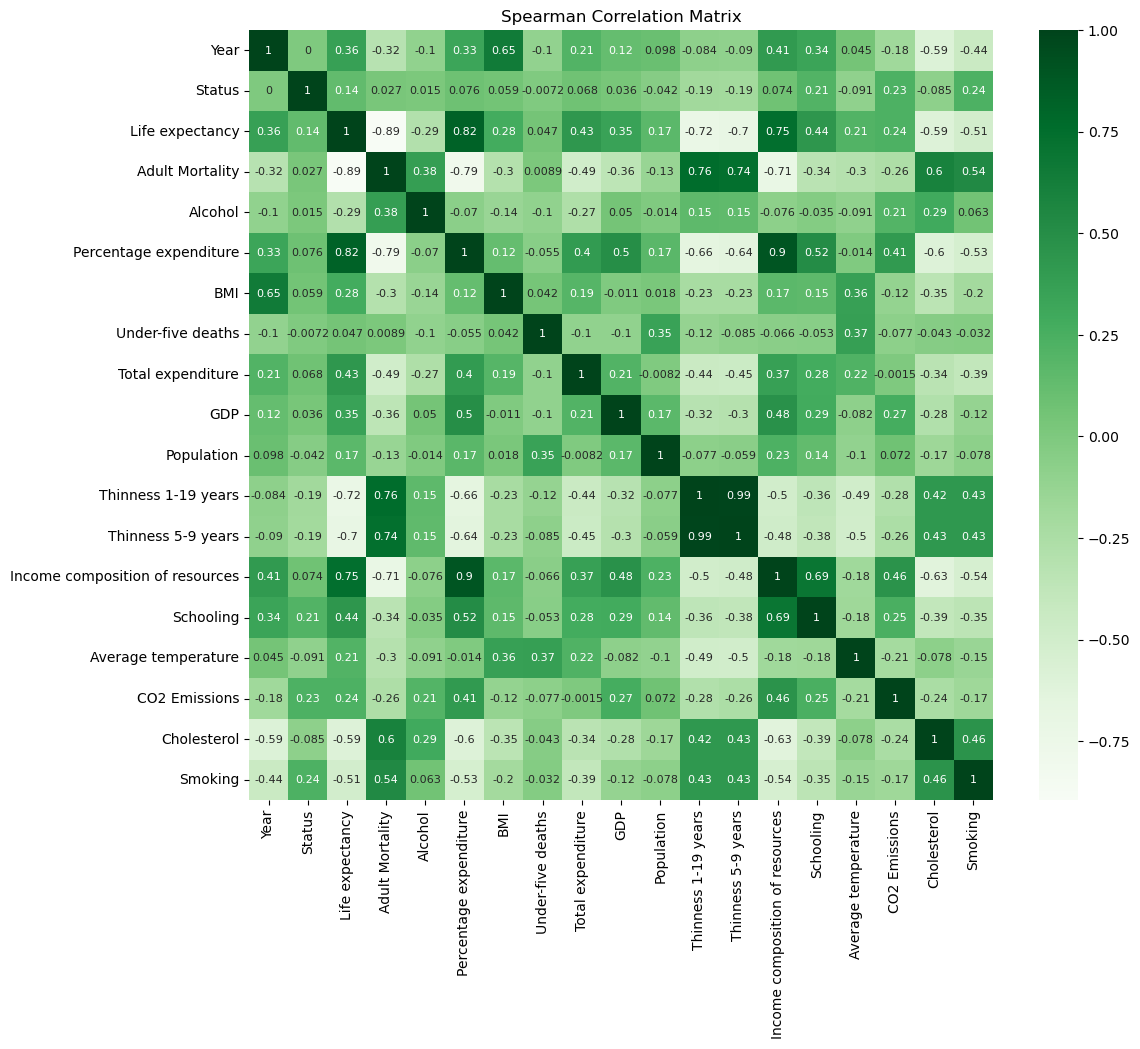

In [14]:
fig_1 = plt.figure(figsize=(12, 10))
new_correlations2 = df.corr(method='spearman')
sns.heatmap(new_correlations2, annot=True, cmap='Greens', annot_kws={'size': 8})
plt.title('Spearman Correlation Matrix')
plt.show()

In [15]:
highly_correlated_features = new_correlations2[new_correlations2 > 0.50]
highly_correlated_features.fillna('-')

Year Status Life expectancy  \
Year                                  1.0      -               -   
Status                                  -    1.0               -   
Life expectancy                         -      -             1.0   
Adult Mortality                         -      -               -   
Alcohol                                 -      -               -   
Percentage expenditure                  -      -         0.82286   
BMI                              0.649125      -               -   
Under-five deaths                       -      -               -   
Total expenditure                       -      -               -   
GDP                                     -      -               -   
Population                              -      -               -   
Thinness 1-19 years                     -      -               -   
Thinness 5-9 years                      -      -               -   
Income composition of resources         -      -        0.745329   
Schooling                               -      -               -   
Average temperature                     -      -               -   
CO2 Emissions                           -      -               -   
Cholesterol                             -      -               -   
Smoking                                 -      -               -   

                                Adult Mortality Alcohol  \
Year                                          -       -   
Status                                        -       -   
Life expectancy                               -       -   
Adult Mortality                             1.0       -   
Alcohol                                       -     1.0   
Percentage expenditure                        -       -   
BMI                                           -       -   
Under-five deaths                             -       -   
Total expenditure                             -       -   
GDP                                           -       -   
Population                                    -       -   
Thinness 1-19 years                    0.757672       -   
Thinness 5-9 years                     0.738793       -   
Income composition of resources               -       -   
Schooling                                     -       -   
Average temperature                           -       -   
CO2 Emissions                                 -       -   
Cholesterol                            0.599531       -   
Smoking                                 0.53722       -   

                                Percentage expenditure       BMI  \
Year                                                 -  0.649125   
Status                                               -         -   
Life expectancy                                0.82286         -   
Adult Mortality                                      -         -   
Alcohol                                              -         -   
Percentage expenditure                             1.0         -   
BMI                                                  -       1.0   
Under-five deaths                                    -         -   
Total expenditure                                    -         -   
GDP                                                  -         -   
Population                                           -         -   
Thinness 1-19 years                                  -         -   
Thinness 5-9 years                                   -         -   
Income composition of resources               0.902734         -   
Schooling                                     0.516511         -   
Average temperature                                  -         -   
CO2 Emissions                                        -         -   
Cholesterol                                          -         -   
Smoking                                              -         -   

                                Under-five deaths Total expenditure  GDP  \
Year                                            -         

In [16]:
highly_correlated_features = new_correlations2[new_correlations2 < -0.50]
highly_correlated_features.fillna('-')

Year Status Life expectancy  \
Year                                    -      -               -   
Status                                  -      -               -   
Life expectancy                         -      -               -   
Adult Mortality                         -      -         -0.8949   
Alcohol                                 -      -               -   
Percentage expenditure                  -      -               -   
BMI                                     -      -               -   
Under-five deaths                       -      -               -   
Total expenditure                       -      -               -   
GDP                                     -      -               -   
Population                              -      -               -   
Thinness 1-19 years                     -      -       -0.717273   
Thinness 5-9 years                      -      -       -0.701696   
Income composition of resources         -      -               -   
Schooling                               -      -               -   
Average temperature                     -      -               -   
CO2 Emissions                           -      -               -   
Cholesterol                     -0.586706      -       -0.591437   
Smoking                                 -      -       -0.507156   

                                Adult Mortality Alcohol  \
Year                                          -       -   
Status                                        -       -   
Life expectancy                         -0.8949       -   
Adult Mortality                               -       -   
Alcohol                                       -       -   
Percentage expenditure                -0.791786       -   
BMI                                           -       -   
Under-five deaths                             -       -   
Total expenditure                             -       -   
GDP                                           -       -   
Population                                    -       -   
Thinness 1-19 years                           -       -   
Thinness 5-9 years                            -       -   
Income composition of resources       -0.710904       -   
Schooling                                     -       -   
Average temperature                           -       -   
CO2 Emissions                                 -       -   
Cholesterol                                   -       -   
Smoking                                       -       -   

                                Percentage expenditure BMI Under-five deaths  \
Year                                                 -   -                 -   
Status                                               -   -                 -   
Life expectancy                                      -   -                 -   
Adult Mortality                              -0.791786   -                 -   
Alcohol                                              -   -                 -   
Percentage expenditure                               -   -                 -   
BMI                                                  -   -                 -   
Under-five deaths                                    -   -                 -   
Total expenditure                                    -   -                 -   
GDP                                                  -   -                 -   
Population                                           -   -                 -   
Thinness 1-19 years                          -0.656979   -                 -   
Thinness 5-9 years                           -0.642979   -                 -   
Income composition of resources                      -   -                 -   
Schooling                                            -   -                 -   
Average temperature                                  -   -                 -   
CO2 Emissions                                        -   -                 -   
Cholesterol                                  -0.596357 

In [17]:
Austria = df.loc[df['Country'] == 'Austria']
Belgium = df.loc[df['Country'] == 'Belgium']
Bulgaria = df.loc[df['Country'] == 'Bulgaria']
Croatia = df.loc[df['Country'] == 'Croatia']
Czechia = df.loc[df['Country'] == 'Czechia']
Denmark = df.loc[df['Country'] == 'Denmark']
Estonia = df.loc[df['Country'] == 'Estonia']
Finland = df.loc[df['Country'] == 'Finland']
France = df.loc[df['Country'] == 'France']
Germany = df.loc[df['Country'] == 'Germany']
Greece = df.loc[df['Country'] == 'Greece']
Hungary = df.loc[df['Country'] == 'Hungary']
Ireland = df.loc[df['Country'] == 'Ireland']
Italy = df.loc[df['Country'] == 'Italy']
Latvia = df.loc[df['Country'] == 'Latvia']
Lithuania = df.loc[df['Country'] == 'Lithuania']
Luxembourg = df.loc[df['Country'] == 'Luxembourg']
Malta = df.loc[df['Country'] == 'Malta']
Netherlands = df.loc[df['Country'] == 'Netherlands']
Poland = df.loc[df['Country'] == 'Poland']
Portugal = df.loc[df['Country'] == 'Portugal']
Romania = df.loc[df['Country'] == 'Romania']
Slovakia = df.loc[df['Country'] == 'Slovakia']
Slovenia = df.loc[df['Country'] == 'Slovenia']
Spain = df.loc[df['Country'] == 'Spain']
Sweden = df.loc[df['Country'] == 'Sweden']

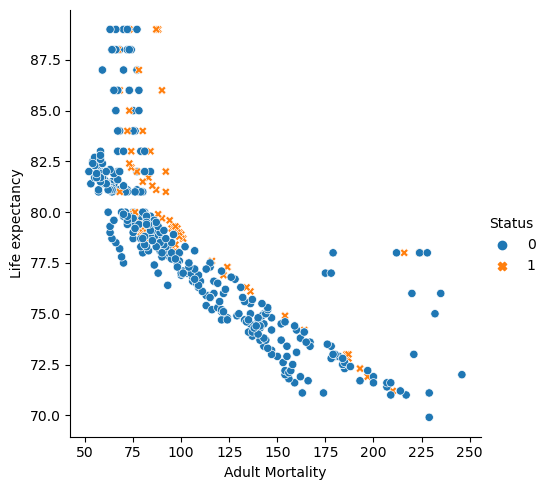

In [18]:
sns.relplot(data=df, x="Adult Mortality", y="Life expectancy", hue="Status", style="Status")
None